In [1]:
import pandas as pd
import numpy as np

In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1, 1.5, 2, 2], random_state=7)

In [4]:
x.shape

(100, 2)

In [5]:
y.shape

(100,)

In [9]:
df_blobls = pd.DataFrame(
    {
    'x1' : x[:,0],
    'x2': x[:,1],
    'y' : y
    }
        )
df_blobls

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


In [18]:
def plot_2d_clusters(x,y,ax):
    y_uniques = pd.Series(y).unique()

    for cluster in y_uniques:
        x[y==cluster].plot(
            title=f'{len(y_uniques)} Clusters',
            kind='scatter',
            x='x1',
            y='x2',
            marker = f'${cluster}$',
            ax = ax
        )

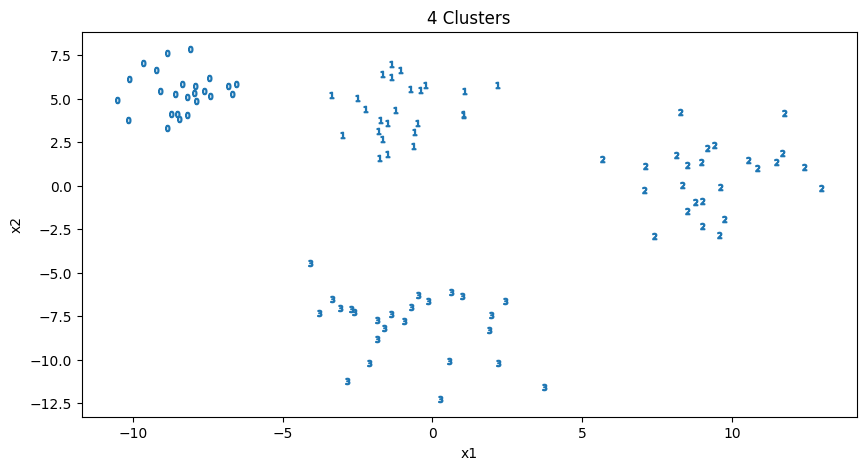

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
x, y = df_blobls[['x1','x2']], df_blobls['y']
plot_2d_clusters(x,y,ax)
plt.show()

<h3>Modelo<h3>

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=4, random_state=7)
kmeans

KMeans(n_clusters=4, random_state=7)

In [22]:
y_pred = kmeans.fit_predict(x)

/Users/mayel/jupyter/clustering/clustering_venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mayel/jupyter/clustering/clustering_venv/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


In [23]:
y_pred

array([2, 3, 1, 2, 1, 2, 3, 0, 1, 3, 3, 0, 3, 1, 2, 3, 3, 0, 3, 1, 2, 1,
       1, 3, 0, 1, 0, 0, 3, 2, 3, 3, 2, 3, 3, 1, 0, 1, 2, 1, 3, 2, 2, 0,
       2, 0, 1, 1, 0, 1, 0, 3, 0, 3, 2, 1, 2, 3, 2, 2, 2, 3, 2, 0, 1, 0,
       1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 2, 2, 2, 1, 3, 0, 3, 0, 1,
       1, 2, 3, 2, 1, 3, 0, 0, 3, 2, 1, 2], dtype=int32)

Text(0.5, 1.0, 'Kmeans 4 Clusters')

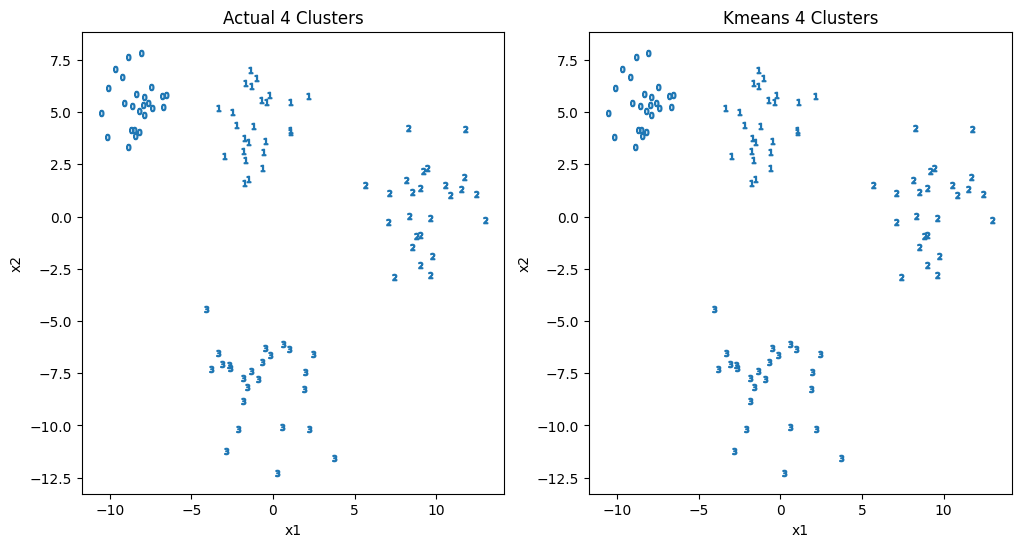

In [24]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
plot_2d_clusters(x,y,axs[0])
plot_2d_clusters(x,y,axs[1])

axs[0].set_title(f'Actual {axs[0].get_title()}')
axs[1].set_title(f'Kmeans {axs[1].get_title()}')